In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Clustering Example

In [2]:
# Read data
def setup_stores():
    stores = pd.read_csv("stores.csv")
    stores.index = stores['Store']
    sales = pd.read_csv('sales.zip')
    sales['Date'] = pd.to_datetime(sales['Date'])
    sales.index = sales['Date']
    features = pd.read_csv("features.zip")
    # Data Wrangling
    # Add additional store features
    stores['Mean_sales'] = sales.groupby('Store')['Weekly_Sales'].mean()
    stores['Mean_Temp'] = features.groupby('Store')['Temperature'].mean()
    return stores

In [3]:
stores = setup_stores()
stores.head()

,Store,Type,Size,Mean_sales,Mean_Temp
Store,,,,,
1,1,A,151315,21710.543621,66.912033
2,2,A,202307,26898.070031,66.728407
3,3,B,37392,6373.033983,70.394176
4,4,A,205863,29161.210415,61.416648
5,5,B,34875,5053.415813,68.224505


In [4]:
type_colors_map = dict(A="red", B="blue", C="green")
stores['Type'].map(type_colors_map)


Store
1       red
2       red
3      blue
4       red
5      blue
6       red
7      blue
8       red
9      blue
10     blue
11      red
12     blue
13      red
14      red
15     blue
16     blue
17     blue
18     blue
19      red
20      red
21     blue
22     blue
23     blue
24      red
25     blue
26      red
27      red
28      red
29     blue
30    green
31      red
32      red
33      red
34      red
35     blue
36      red
37    green
38    green
39      red
40      red
41      red
42    green
43    green
44    green
45     blue
Name: Type, dtype: object

<Axes: xlabel='Mean_sales', ylabel='Size'>

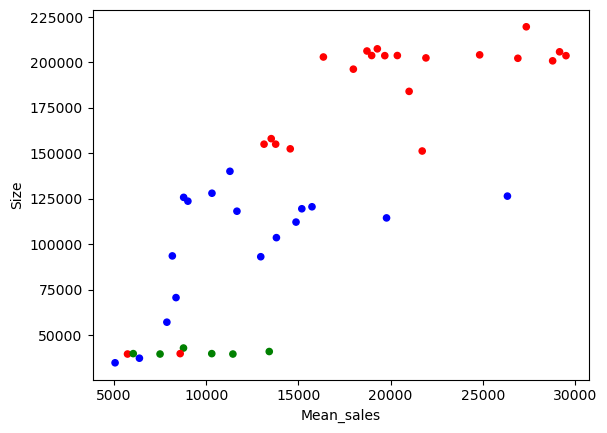

In [5]:
type_colors_map = dict(A="red", B="blue", C="green")
stores.plot.scatter('Mean_sales', 'Size', c = stores['Type'].map(type_colors_map))

In [6]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, n_init=10)
# Let's cluster according to sales and size
X = stores[['Mean_sales', 'Size']]
y = kmeans3.fit_predict(X)
y

array([0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1,
       0], dtype=int32)

<Axes: xlabel='Mean_sales', ylabel='Size'>

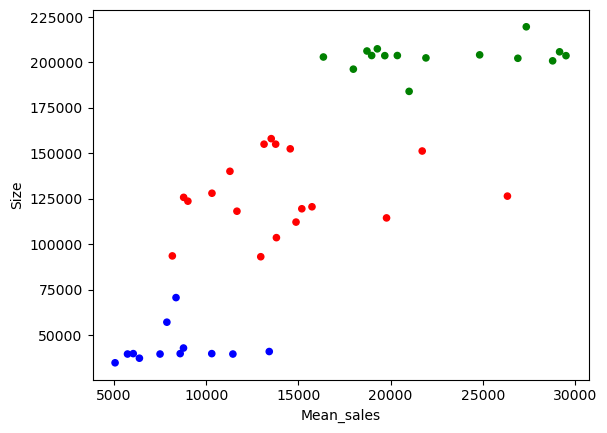

In [7]:
colors = list(type_colors_map.values())
stores.plot.scatter('Mean_sales', 'Size', c = [ colors[k] for k in y])

In [8]:
# type_colors_map2 = {0:"red", 1:"blue", 2: "green"}
# stores.plot.scatter('Mean_sales', 'Size', c = pd.Series(y).map(type_colors_map2))

## 2. PCA Example

In [9]:
from sklearn.decomposition import PCA
X = stores[['Mean_sales', 'Size', 'Mean_Temp']]
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print("Original shape:", X.shape)
print("PCA shape:", X_r.shape)

Original shape: (45, 3)
PCA shape: (45, 2)


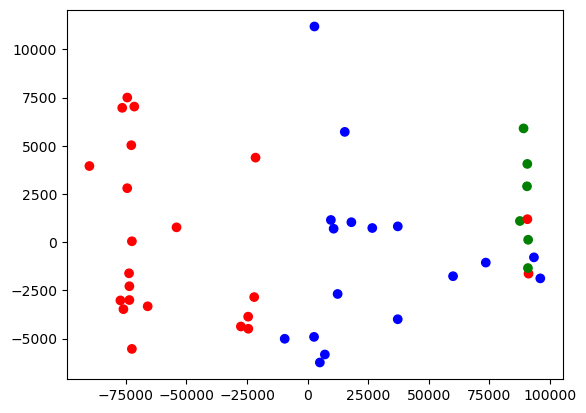

In [10]:
type_colors_map = dict(A="red", B="blue", C="green")
plt.scatter(X_r[:,0], X_r[:,1],c = stores['Type'].map(type_colors_map))

## 3. MLP Regression

In [11]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train = housing.data
y_train = housing.target

In [12]:
# Standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=50, max_iter=500)
# Train ML model
mlp.fit(X_train_scaled, y_train)
print("MLP's score: ", mlp.score(X_train_scaled, y_train))

MLP's score:  0.7927478014702037


In [14]:
def my_R2_score(y_pred, y_true):
    # Make both 1D arrays
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()
    SS = ((y_true - y_pred)**2).sum()
    resSS = ((y_true - y_true.mean())**2).sum()
    return(1 - SS / resSS)
# Score on training data (in this case R^2)
print("My R2 score: ",
      my_R2_score(mlp.predict(X_train_scaled), y_train))

My R2 score:  0.7927478014702037


## 4. MLP Regression: Training & Testing

In [15]:
## 1. Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.10)
print(f'X_train = {X_train.shape}, y_train = {y_train.shape}, X_test = {X_test.shape}, y_test = {y_test.shape}')

X_train = (18576, 8), y_train = (18576,), X_test = (2064, 8), y_test = (2064,)


In [16]:
## 2. Data Preprocessing
# Standardization (z-score normalization)
from sklearn.preprocessing import StandardScaler
# We fit the scaler on the train data and apply to both train and test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.06583692, -0.84067759, -0.42848325, ...,  0.14039262,
         0.42689963,  0.13783023],
       [ 0.3007975 , -0.60245526,  0.26669049, ..., -0.06801169,
         0.62830343, -1.16593461],
       [ 0.45316444, -0.20541803,  0.41353319, ..., -0.04407417,
        -1.32016129,  1.19682696],
       ...,
       [ 1.29430337,  0.58865642,  0.87765932, ..., -0.05339296,
         1.29340437, -1.38073112],
       [-1.18348203, -0.92008503, -0.44423164, ..., -0.10146783,
         0.2629663 ,  0.23274032],
       [ 2.22214198, -1.63475204,  0.97775402, ...,  0.02420445,
        -0.81899368,  0.89711091]])

In [17]:
## 3. Train ML model
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=100, max_iter = 500)
mlp.fit(X_train_scaled, y_train)
## 4. Score on train data
mlp.score(X_train_scaled, y_train)

0.800863659267219

In [18]:
## 5. Score on test data 
mlp.score(X_test_scaled, y_test)

0.7905367355996376

## 5. Quiz

In [19]:
"""## Choosing between models"""
mlpA = MLPRegressor(hidden_layer_sizes=100, max_iter = 500)
mlpB = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter = 500)
# Train ML model
mlpA.fit(X_train_scaled, y_train)
mlpB.fit(X_train_scaled, y_train)

print(f'mlpA score on test data: {mlpA.score(X_test_scaled, y_test)}')
print(f'mlpB score on test data: {mlpB.score(X_test_scaled, y_test)}')

print(mlpA.score(X_train_scaled, y_train))
print(mlpB.score(X_train_scaled, y_train))

mlpA score on test data: 0.7820683266984342
mlpB score on test data: 0.7981612177482024
0.7827897610393414
0.8275480633606452


## 6. Cross-validation

In [20]:
def print_cv_scores(s):
    # :0.2f prints with 2 decimal places
    print(f"{len(scores)}-fold CV score: {s.mean():0.2f} (+/- {s.std()*2:0.2f})")

In [21]:
from sklearn.model_selection import cross_val_score
mlp = MLPRegressor(hidden_layer_sizes=50, max_iter = 500)
# K-fold cross-validation (this takes time!)
scores = cross_val_score(mlp, X_train_scaled, y_train, cv = 10)
print_cv_scores(scores)

10-fold CV score: 0.77 (+/- 0.03)


In [22]:
mlp_small = MLPRegressor(hidden_layer_sizes=10, max_iter = 500)
scores = cross_val_score(mlp_small, X_train_scaled, y_train, cv=10)
print_cv_scores(scores)

10-fold CV score: 0.75 (+/- 0.04)
